**Задание SQL**

In [ ]:
# создание файла БД (SQLite) , создание таблиц, внесение данных
import sqlite3


conn = sqlite3.connect('test.db')
conn.execute('''
CREATE TABLE IF NOT EXISTS Partner(partner_ID integer, 
                      name_partner text);''')
conn.commit()
conn.execute('''
CREATE TABLE IF NOT EXISTS Fact(region_ID integer, 
                      region text, 
                      partner_ID integer, 
                      date date,
                      fact integer);''')
conn.commit()
print("Таблицы созданы");
# заполнение таблицы Partner
conn.execute("INSERT INTO Partner (partner_ID, name_partner) VALUES(1, 'ИП Лосев');")
conn.execute("INSERT INTO Partner (partner_ID, name_partner) VALUES(2, 'ИП Косогов');")
conn.execute("INSERT INTO Partner (partner_ID, name_partner) VALUES(3, 'ИП Романенко');")
conn.commit()
# заполнение таблицы Fact
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(1, 'Адыгея', 1, '2021-1-1', 4);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(2, 'Краснодар', 1, '2021-2-1', 2);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(3, 'Новгород', 2, '2021-3-1', 3);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(4, 'Краснодар', 1, '2021-4-1', 3);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(5, 'Саратов', 3, '2021-5-1', 9);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(6, 'Саратов', 3, '2021-6-1', 7);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(7, 'Краснодар', 1, '2021-7-1', 5);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(8, 'Адыгея', 1, '2021-8-1', 13);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(9, 'Самара', 3, '2021-9-1', 2);")
conn.execute("INSERT INTO Fact (region_ID, region, partner_ID, date, fact) VALUES(10, 'Волгоград', 3, '2021-10-1', 15);")
conn.commit()
print("Данные внесены в таблицы");
conn.close()

In [29]:
# Вывести наименование, регион и продажи тех партнеров, продажи которых больше 8, в отсортированном по убыванию
conn = sqlite3.connect('test.db')
cursor = conn.execute(''' SELECT DISTINCT Partner.name_partner, Fact.region, Fact.fact FROM Partner JOIN Fact ON Partner.partner_ID=Fact.partner_ID WHERE Fact.fact>8 group BY Fact.fact ORDER by COUNT(*) DESC;''')
for row in cursor:
  print(f'наименование "{row[0]}" регион "{row[1]}" продажи {row[2]}')
conn.close()

наименование "ИП Романенко" регион "Волгоград" продажи 15
наименование "ИП Лосев" регион "Адыгея" продажи 13
наименование "ИП Романенко" регион "Саратов" продажи 9


 **Excell Задание 2**

In [1]:
import pandas as pd

excell =pd.read_csv('excell.csv', delimiter=',', decimal='.')
excell

,Квартал,Месяц,Год,Вид,Статья,Бизнес,A,B,C,D,E,F,G
0,4 квартал,дек,2016,B2C,Доходы,m,7119,8530,4471,8534,7839,9871,6571
1,2 квартал,апр,2018,IoT,Доходы,m,4599,5172,6068,4389,8973,3070,348
2,2 квартал,апр,2016,M2M,Доходы,m,3056,8972,2399,8962,6420,6280,7814
3,3 квартал,июл,2017,B2G,Абоненты,r,286,5105,1589,3903,6894,4471,8915
4,1 квартал,мар,2016,B2G,Абоненты,r,6293,6786,5663,1988,7828,7148,4935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3 квартал,сен,2017,B2C,Доходы,f,1632,8046,7050,8491,6454,8791,7342
196,2 квартал,май,2018,B2G,OIBDA,r,3351,7648,8973,4120,9192,9705,3750
197,1 квартал,янв,2016,B2B,Доходы,f,4796,3638,693,9815,2857,8549,547
198,3 квартал,авг,2018,M2M,OIBDA,m,831,6721,3087,4317,1847,7874,9479


In [2]:
excell = excell.drop(['Квартал', 'Месяц', 'Вид', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], axis = 1)

In [3]:
edrop = excell.drop_duplicates()

In [4]:
for year in range(2014,2019):
    if edrop[(edrop.Год==year)].shape[0] != 9:
        print(year)
        notfull = edrop[(edrop.Год==year)]
        l = ('r','f','m')
        for busines in l:
             if notfull[(notfull.Бизнес==busines)].shape[0] != 3:
                    print(notfull[(notfull.Бизнес==busines)])

2015
     Год    Статья Бизнес
42  2015    Доходы      m
64  2015  Абоненты      m


**В 2015 году отсутсвует Статья OIBDA.**

**Примеры аналитических диаграмм.**

In [7]:
import pandas as pd

df_BI =pd.read_csv('BI.csv', delimiter=',', decimal='.')
tri = df_BI[(df_BI.Компания == 'Триколор')]

In [8]:
dfc = tri.groupby('Месяц активации')['Продажи'].agg(count='count').sort_values(by=['count'],ascending = False)

In [9]:
dfc = pd.DataFrame(dfc)
dfc_dict = dfc.iloc[:].to_dict()
x_pos = []
data_g = []
dfc_list = dfc_dict['count'] 
for i,v in dfc_list.items():
    x_pos.append(i)
    data_g.append(v)

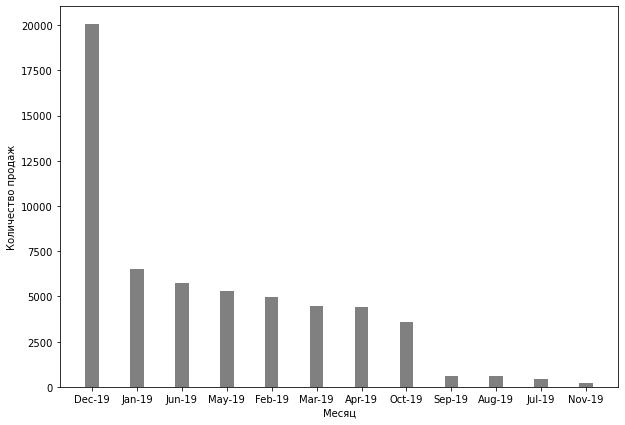

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 7))
plt.bar(x_pos, data_g, color='grey', width=0.3)
plt.xlabel("Месяц")
plt.ylabel("Количество продаж")

plt.show()

Максимум продаж приходится на зимние месяцы и начало весны, исходя из этого можно сделать выводы:
Особенность рынка - сезонность.
Представляется разумным начинать поздней осенью активно рекламировать продукт и проводить маркетинговые акции, выходя на пик в зимний период.
Декабрь - пиковый период, в который должны быть сконцентрированы максимальные усилия, т.к. за один месяц получается квартальная выручка.

In [20]:
dfr = tri.groupby('Тип ТВ')['Продажи'].agg(count='count').sort_values(by=['count'],ascending = True)

In [21]:
dfr_temp = pd.DataFrame(dfr)
dfc_dict = dfr_temp.iloc[:].to_dict()
x_pos = []
data_g1 = []
dfc_list = dfc_dict['count'] 
for i,v in dfc_list.items():
    x_pos.append(i)
    data_g1.append(v)
dfr

,count
Тип ТВ,
Гибридные,92
Линейные,56714


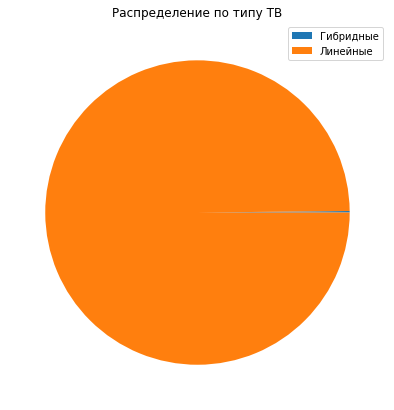

In [22]:
plt.figure(figsize=(10, 7))

plt.pie(data_g1)

plt.title('Распределение по типу ТВ')
plt.legend(x_pos)

plt.show()

Гибридный тип ТВ практически не представлен. Для формулирования гипотез необходимо понять масштаб деятельности по данному типу в разрезе затрат. Возможно от данного типа можно отказаться, сконцентрировав усилия на основном направлении деятельности. 

In [23]:
dflos = tri.groupby('Регион')['Продажи'].agg(count='count').sort_values(by=['count'],ascending = True)
dflos

,count
Регион,
Мурманская,1
Сахалинская,95
Калининградская,103
Ингушетия,105
Алтай,139
...,...
Самарская,2210
Свердловская,2482
Башкортостан,2676


In [24]:
dflos_temp = pd.DataFrame(dflos)
dfc_dict = dflos_temp.iloc[:].to_dict()
x_pos = []
data_g2 = []
counter = 0
dfc_list = dfc_dict['count'] 
for i,v in dfc_list.items():
    x_pos.append(i)
    data_g2.append(v)
    counter+=1
    if counter==10:
        break
x_pos.append('Москва г')
data_g2.append(dfc_list['Москва г'])

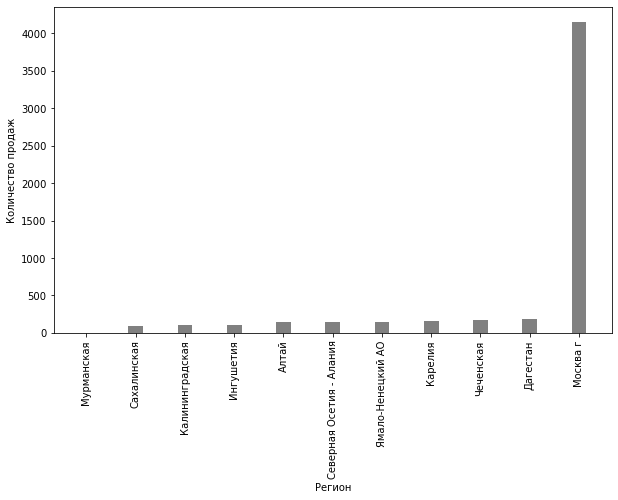

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(x_pos, data_g2, color='grey', width=0.3)
plt.xlabel("Регион")
plt.ylabel("Количество продаж")
plt.xticks(rotation = 'vertical')
plt.show()

На диаграме представлены регионы с минимальными продажами, на первый взгляд они выглядят как потенциально интересные рынки,  активизировав усилия на которых, можно увеличить свое присутствие, поднять продажи и оборот компании.

**Анализ отчета о Прибылях и Убытках (P&L)**

In [167]:
import pandas as pd

pl =pd.read_csv('PL.csv', delimiter=',', decimal='.', index_col= False)
pl

,Статьи,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,...,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19
0,Выручка за услуги,13355677,13388955,14408677,13626310,14428177,16155955,14388327,16062527,17032512,...,14408677,13626310,14428177,16155955,14388327,16062527,17032512,16612527,14368352,16428752
1,Услуги сетей магазинов,10300500,10333778,11353500,10571133,11373000,13100778,11333150,13007350,13977335,...,11353500,10571133,11373000,13100778,11333150,13007350,13977335,13557350,11313175,13373575
2,Услуги сетей складов,3055177,3055177,3055177,3055177,3055177,3055177,3055177,3055177,3055177,...,3055177,3055177,3055177,3055177,3055177,3055177,3055177,3055177,3055177,3055177
3,Себестоимость услуг,2511224,2737175,3271351,3056966,5218145,3870742,2653769,2893042,3205375,...,3241051,3053666,4887515,3870742,2653769,2893042,3205395,2890542,2608044,3093601
4,Амортизация оборудования,25300,25300,25300,25300,25300,25300,25300,25300,25300,...,25300,25300,25300,25300,25300,25300,25300,25300,25300,25300
5,Аренда помещений,2335700,2335700,2503372,2503372,2503372,2503372,2503372,2503372,2503362,...,2503372,2503372,2503372,2503372,2503372,2503372,2503372,2503372,2503372,2503372
6,Вывески,32550,275500,32550,32550,32550,272000,500,2500,-,...,32250,32250,32250,272000,500,2500,-,-,-,-
7,Рекламная продукция,33304,33305,335759,33374,2572553,333000,70227,70000,332353,...,335759,33374,2272223,333000,70227,70000,332353,70000,25002,237259
8,Доставка,-,-,290000,-,-,290000,-,-,290000,...,290000,-,-,290000,-,-,290000,-,-,273300
9,Маркетинговые материалы,52000,35000,52000,35000,52000,22000,22000,22000,22000,...,22000,32000,22000,22000,22000,22000,22000,22000,22000,22000


In [168]:
pld = pl.drop(pl.columns[[0]], axis = 1)

In [169]:
turn = pd.DataFrame(pld.iloc[0])
#net_profit.reset_index(drop= True , inplace= True )
turn.columns = ['Amount']
turn = turn.sort_index()

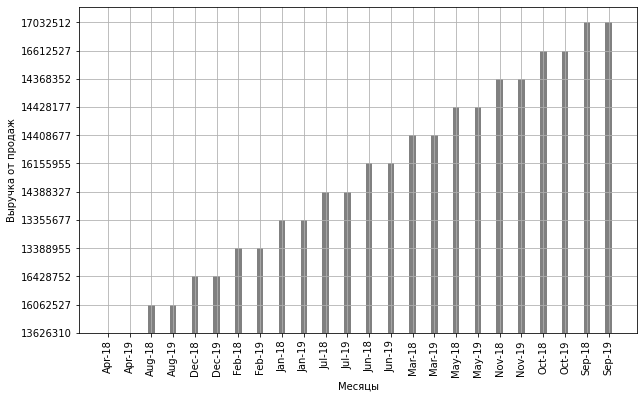

In [170]:
plt.figure(figsize=(10, 6))
plt.bar(turn.index, turn['Amount'], color='grey', width=0.3)
plt.xlabel("Месяцы")
plt.ylabel("Выручка от продаж")
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.show()

In [171]:
pl1=pl.T

In [172]:
pl1.columns = [pl1.iloc[0]]
pld=pl1.drop(labels = ['Статьи'],axis = 0)


In [173]:
pld.describe()

Статьи,Выручка за услуги,Услуги сетей магазинов,Услуги сетей складов,Себестоимость услуг,Амортизация оборудования,Аренда помещений,Вывески,Рекламная продукция,Доставка,Маркетинговые материалы,...,Охрана труда,Охранное оборудование,Бухгалтерия и отчеты,Телефонная связь,Коммерческим расходам,Обслуживание кассовых аппаратов,Прочие расходы,Расходы по корпоративным мероприятиям,Расходы на услуги банков,Чистая прибыль
count,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
unique,12,12,1,21,1,3,8,15,4,4,...,2,7,2,1,2,2,7,3,6,24
top,13626310,11353500,3055177,2653769,25300,2503372,-,70000,-,22000,...,-,-,-,3172,-,-,9350,-,9350,13237250
freq,2,2,24,2,24,16,8,3,16,17,...,22,12,22,24,18,18,8,20,10,1


In [192]:
turn = pld['Выручка за услуги'].median()
costs = pld['Себестоимость услуг'].median()
margin = int(turn.values)/int(costs.values)*100
print(f'Медианная прибыль компании, согласно отчета: {margin} %')

Медианная прибыль компании, согласно отчета: 484.92130435864686 %


**ИТОГО:
на диаграмме наглядно видно, что данные по Выручке за два года недостоверны.
Кроме этого, если проанализировать отчет, понятно, что данные по затратам тоже недостоверны.
Вероятнее всего ошибка в позиции "Амортизация оборудования".**